Connecting to databse

In [17]:
import sqlite3
import pandas as pd

takeaway_db = '../databases/takeaway.db'
deliveroo_db ='../databases/deliveroo.db'
ubereats_db ='../databases/ubereats.db'

def query_db(db, sql_query):
    ''' input: db (path to SQLite database), sql_query (str)
        output: pandas DataFrame
    '''
    conn = sqlite3.connect(db)
    with conn:
        res = pd.read_sql_query(sql_query, conn)
    if conn:
        conn.close()
    return res

In [18]:
query = """ SELECT categories.name, AVG(menuItems.price) AS avg_price
            FROM menuItems
            LEFT JOIN categories ON menuItems.ID = categories.item_id
            GROUP BY categories.name
        """

query_deliveroo =  '''
        SELECT name ,latitude,longitude
        FROM restaurants   
        where postal_code != ''
        ;    
'''

query_takeaway = """ SELECT name, latitude,longitude
                     FROM restaurants
                     
                """
query_ubereats = """ SELECT title, location__latitude, location__longitude
                     FROM restaurants
                """

count_deliveroo = """ 
SELECT count(id)
FROM restaurants
"""

count_takeaway = """ 
SELECT count(primarySlug)
FROM restaurants
"""

count_ubereats = """ 
SELECT count(id)
FROM restaurants
"""

rest_deliveroo = """ 
SELECT name 
"""

df = query_db(deliveroo_db, count_deliveroo)
print(df)

   count(id)
0       2716


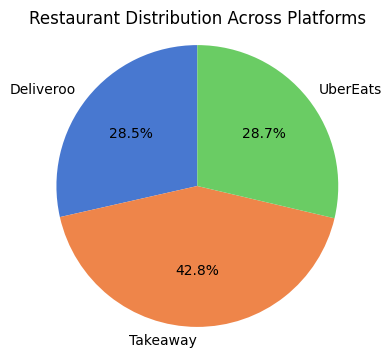

In [19]:
# pie chart distribution of restaurants for diffrent platform
import matplotlib.pyplot as plt
import seaborn as sns


# Query each database and get the counts
deliveroo_count = query_db(deliveroo_db, count_deliveroo).iloc[0, 0]  # Get the first row and first column value
takeaway_count = query_db(takeaway_db, count_takeaway).iloc[0, 0]
ubereats_count = query_db(ubereats_db, count_ubereats).iloc[0, 0]

# Create a DataFrame for the counts
platforms = ['Deliveroo', 'Takeaway', 'UberEats']
counts = [deliveroo_count, takeaway_count, ubereats_count]
count_df = pd.DataFrame({'Platform': platforms, 'Restaurant Count': counts})

# Create a pastel color palette from Seaborn
colors = sns.color_palette("muted", 3)

# Plot a pie chart
plt.figure(figsize=(4,4))
plt.pie(count_df['Restaurant Count'], labels=count_df['Platform'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Restaurant Distribution Across Platforms')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [20]:
# Query to get restaurant names from each platform's database

# For Deliveroo
query_deliveroo_names = """SELECT name FROM restaurants"""
deliveroo_restaurants = query_db(deliveroo_db, query_deliveroo_names)['name'].unique()

# For Takeaway
query_takeaway_names = """SELECT name FROM restaurants"""
takeaway_restaurants = query_db(takeaway_db, query_takeaway_names)['name'].unique()

# For UberEats
query_ubereats_names = """SELECT title FROM restaurants"""
ubereats_restaurants = query_db(ubereats_db, query_ubereats_names)['title'].unique()


In [21]:
# Convert lists to sets for easy set operations
deliveroo_set = set(deliveroo_restaurants)
takeaway_set = set(takeaway_restaurants)
ubereats_set = set(ubereats_restaurants)

# Find the common restaurants across the platforms
common_deliveroo_takeaway = deliveroo_set.intersection(takeaway_set)
common_deliveroo_ubereats = deliveroo_set.intersection(ubereats_set)
common_takeaway_ubereats = takeaway_set.intersection(ubereats_set)
common_all_three = deliveroo_set.intersection(takeaway_set, ubereats_set)


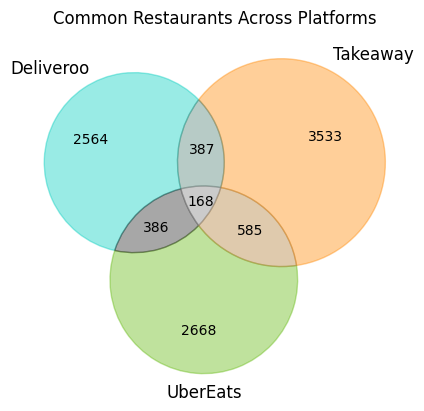

UberEats has the highest number of restaurants, suggesting that UberEats may be the market leader.


In [22]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define company colors for each platform
deliveroo_color = '#00cdbe'  # Deliveroo 
takeaway_color = '#ff8800'  # Takeaway 
ubereats_color = '#60b80a'  # UberEats 

# Create the Venn diagram (ensure the sets below are defined)
venn = venn3(subsets=(len(deliveroo_restaurants), len(takeaway_restaurants), len(common_deliveroo_takeaway),
                     len(ubereats_restaurants), len(common_deliveroo_ubereats), len(common_takeaway_ubereats),
                     len(common_all_three)),
             set_labels=('Deliveroo', 'Takeaway', 'UberEats'))

# Set the colors for each region using platform colors
venn.get_patch_by_id('100').set_color(deliveroo_color)  # Deliveroo-only
venn.get_patch_by_id('010').set_color(takeaway_color)  # Takeaway-only
venn.get_patch_by_id('001').set_color(ubereats_color)  # UberEats-only

# Set colors for overlapping regions with custom colors
venn.get_patch_by_id('110').set_color('#4D7F72')  # Deliveroo & Takeaway overlap
venn.get_patch_by_id('011').set_color('#B07C34')  # Takeaway & UberEats overlap
venn.get_patch_by_id('101').set_color('#252525')  # Deliveroo & UberEats overlap
venn.get_patch_by_id('111').set_color('#7D7D7D')  # All three overlap

# Add title to the diagram
plt.title('Common Restaurants Across Platforms')

# Show the plot
plt.show()

# Optional: Display additional analysis
print("UberEats has the highest number of restaurants, suggesting that UberEats may be the market leader.")

#UberEats has the highest number of restaurants, it suggests that UberEats is likely the market leader.

In [23]:

query_deliveroo_categories = """SELECT restaurants.category, count(restaurants.id) as res_count 
FROM restaurants 
JOIN menu_items on menu_items.restaurant_id = restaurants.id
GROUP BY restaurants.category 
ORDER BY res_count DESC
LIMIT 5
;
"""

query_deliveroo_deals = """select count (*) from
(SELECT  count(categories.name) as cat_count ,restaurants.id
FROM restaurants 
JOIN categories on restaurants.id = categories.restaurant_id
Where categories.name like '%deal%'
Group by categories.restaurant_id)
;
"""
query_takeaway_deals ="""select count (*) from
(SELECT  count(menuItems.name) as cat_count ,menuItems.primarySlug
FROM menuItems 
Where menuItems.name like '%deal%'
Group by menuItems.primarySlug)
;
"""


query_ubereats_deals = """select count (*) from
(SELECT  count(name) as cat_count ,restaurant_id
FROM menu_items 
Where name like '%deal%'
Group by restaurant_id)
;
"""

query_takeaway_categories = """SELECT categories.name, count(restaurants.primarySlug) as res_count
FROM restaurants 
JOIN categories ON categories.restaurant_id = restaurants.primarySlug
GROUP BY categories.name 
ORDER BY res_count DESC
LIMIT 5
"""

query_ubereats_categories = """SELECT restaurant_to_categories.category, count(restaurants.id) as res_count
FROM restaurants 
JOIN restaurant_to_categories ON restaurant_to_categories.restaurant_id = restaurants.id
GROUP BY restaurant_to_categories.category
ORDER BY res_count DESC
LIMIT 5
"""

qu = """select restaurants.title
from restaurants
JOIN restaurant_to_categories ON restaurant_to_categories.restaurant_id = restaurants.id
where restaurant_to_categories.category like '%â‚¬â‚¬%'
"""
qurey_take = """select distinct primarySlug
FROM menuItems 
where name like '%deal%'
group by primarySlug
"""
# take = query_db(takeaway_db, qurey_take)
# display(take)

qurey_uber = """select distinct restaurant_id
FROM menu_items 
where name like '%deal%'
group by restaurant_id
"""
# uber = query_db(ubereats_db, qurey_uber)
# display(uber)
# deliveroo_categories = query_db(deliveroo_db, query_deliveroo_categories)
# takeaway_categories = query_db(takeaway_db, query_takeaway_categories)
# ubereats_categories = query_db(ubereats_db, query_ubereats_categories)
# deliveroo_deals = query_db(deliveroo_db, query_deliveroo_deals)
# takeaway_deals = query_db(takeaway_db, query_takeaway_deals)
# ubereats_deals = query_db(ubereats_db, query_ubereats_deals)

#quer_data = query_db(ubereats_db,qure)
# display(deliveroo_deals)
# display(takeaway_deals)
# display(ubereats_deals)

#display(quer_data)


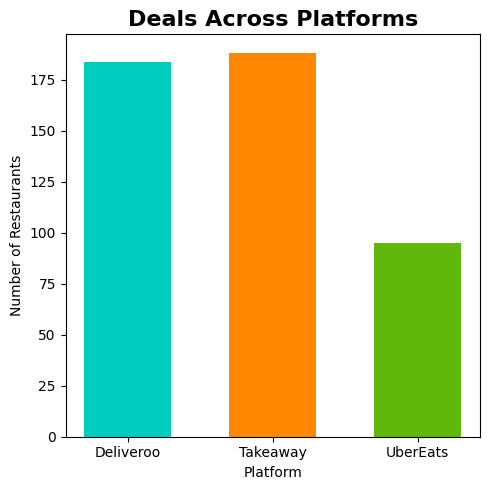

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Query each database and get the counts
deliveroo_count = query_db(deliveroo_db, query_deliveroo_deals).iloc[0, 0]  # Get the first row and first column value
takeaway_count = query_db(takeaway_db, query_takeaway_deals).iloc[0, 0]
ubereats_count = query_db(ubereats_db, query_ubereats_deals).iloc[0, 0]

# Create a DataFrame for the counts
platforms = ['Deliveroo', 'Takeaway', 'UberEats']
counts = [deliveroo_count, takeaway_count, ubereats_count]
count_df = pd.DataFrame({'Platform': platforms, 'Restaurant Count': counts})

# Custom colors
deliveroo_color = '#00cdbe'  # Deliveroo
takeaway_color = '#ff8800'   # Takeaway 
ubereats_color = '#60b80a'   # UberEats 

# Create a list of the colors for each platform
colors = [deliveroo_color, takeaway_color, ubereats_color]

# Plotting the bar chart with custom colors
plt.figure(figsize=(5, 5))
bars = plt.bar(count_df['Platform'], count_df['Restaurant Count'], color=colors, width=0.6)



# Adding labels, title, and grid
plt.xlabel('Platform', fontsize=10)
plt.ylabel('Number of Restaurants', fontsize=10)
plt.title('Deals Across Platforms', fontsize=16, fontweight='bold')

# Customize tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# Display the plot with a clean look
plt.tight_layout()  # Ensures the layout is adjusted nicely
plt.show()


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
test = gpd.read_file(r"..\assets\geo\gadm41_BEL_1.shp")

crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)
geo_df.head()
fig, ax = plt.subplots(figsize = (10,10))
test.to_crs(epsg=4326).plot(ax=ax, color='grey')
geo_df.plot(ax=ax)
ax.set_title('Restaurants in Belgium')

Heatmap for Restaurants distribution.

In [27]:
# for deliveroo and takeaway

import folium
import geopandas as gpd
from shapely.geometry import Point
from folium.plugins import HeatMap  # Import the HeatMap plugin
import webbrowser

df = query_db(deliveroo_db, query_deliveroo)
# Read shapefile for Belgium boundaries
test = gpd.read_file(r"..\assets\geo\gadm41_BEL_2.shp")

# Prepare GeoDataFrame for restaurant locations
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

# Initialize the Folium map (centered around Belgium)
m = folium.Map(location=[50.8503, 4.3517], zoom_start=7)  # Centered on Belgium with zoom level 7

# Add Belgium boundary (GeoJSON) to the map
# Convert the GeoDataFrame to GeoJSON and add it as a layer
folium.GeoJson(test.to_crs(epsg=4326)).add_to(m)

# Prepare data for HeatMap: List of [latitude, longitude]
heat_data = [[row['latitude'], row['longitude']] for _, row in geo_df.iterrows()]

# Add HeatMap layer to the map
HeatMap(heat_data, radius=15, blur=10).add_to(m)

# Save the map with heatmap to an HTML file
map_path = r"..\assets\geo\restaurants_takeaway.html"
m.save(map_path)

# Open map in browser
webbrowser.open(map_path)


c:\Users\Vinay\Desktop\Becode\Projects\delivery-market-analysis-with-SQL\.venv\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


True

In [30]:
# for ubereats
df = query_db(ubereats_db, query_ubereats)
# Read shapefile for Belgium boundaries
test = gpd.read_file(r"..\assets\geo\gadm41_BEL_2.shp")

# Prepare GeoDataFrame for restaurant locations
geometry = [Point(lon, lat) for lon, lat in zip(df['location__longitude'], df['location__latitude'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

# Initialize the Folium map (centered around Belgium)
m = folium.Map(location=[50.8503, 4.3517], zoom_start=7)  # Centered on Belgium with zoom level 7

# Add Belgium boundary (GeoJSON) to the map
# Convert the GeoDataFrame to GeoJSON and add it as a layer
folium.GeoJson(test.to_crs(epsg=4326)).add_to(m)

# Prepare data for HeatMap: List of [latitude, longitude]
heat_data = [[row['location__latitude'], row['location__longitude']] for _, row in geo_df.iterrows()]

# Add HeatMap layer to the map
HeatMap(heat_data, radius=15, blur=10).add_to(m)

# Save the map with heatmap to an HTML file
map_path = r"..\assets\geo\restaurants_ubereats.html"
m.save(map_path)

# Open map in browser
webbrowser.open(map_path)


c:\Users\Vinay\Desktop\Becode\Projects\delivery-market-analysis-with-SQL\.venv\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


True